# Stock Movement Price Forecast Using Support Vector MACHINE (SVM)

# Import Libraries and Load Dataset:

In [31]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import warnings
import yfinance as yf
from datetime import date, timedelta
today = date.today()
# LSTM

import pandas as pd
import yfinance as yf
from datetime import date, timedelta

import warnings
warnings.filterwarnings('ignore')




# Load Dataset and Create Dataframes

In [32]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df1 = yf.download('BTC-USD',             # Change this ticker to whichever ticker you like
                      start=start_date, 
                      end=end_date, 
                      progress=False)
df1["Date"] = df1.index
df1 = df1[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df1.reset_index(drop=True, inplace=True)




print(df1.tail(10))      # Tail method = latest results
print(df1.head(10))
#print("Tesla", df2.tail(5))

# Get values into variables to be used in prediction later on

o = df1.tail(1)[["Open"]] 
h = df1.tail(1)[["High"]]
l = df1.tail(1)[["Low"]]
v = df1.tail(1)[["Volume"]]
c = df1.tail(1)[["Close"]]

dfg=df1


           Date          Open          High           Low         Close  \
3456 2024-03-04  63137.003906  68537.031250  62386.519531  68330.414062   
3457 2024-03-05  68341.054688  69170.625000  59323.910156  63801.199219   
3458 2024-03-06  63776.050781  67637.929688  62848.671875  66106.804688   
3459 2024-03-07  66099.742188  68029.921875  65655.531250  66925.484375   
3460 2024-03-08  66938.093750  70083.054688  66230.453125  68300.093750   
3461 2024-03-09  68299.257812  68673.054688  68053.125000  68498.882812   
3462 2024-03-10  68500.257812  70005.203125  68239.976562  69019.789062   
3463 2024-03-11  69020.546875  72850.710938  67194.882812  72123.906250   
3464 2024-03-12  72125.125000  72825.656250  68728.851562  71481.289062   
3465 2024-03-13  71482.117188  73637.476562  71334.093750  73083.500000   

         Adj Close        Volume  
3456  68330.414062   70670471105  
3457  63801.199219  102802940877  
3458  66106.804688   68750229073  
3459  66925.484375   46989543159  

# Inspect Data:

In [33]:
df = df1[['Adj Close']]
df[['Adj Close']].tail()

,Adj Close
3461,68498.882812
3462,69019.789062
3463,72123.906250
3464,71481.289062
3465,73083.500000


In [34]:
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# Time-Series Analysis

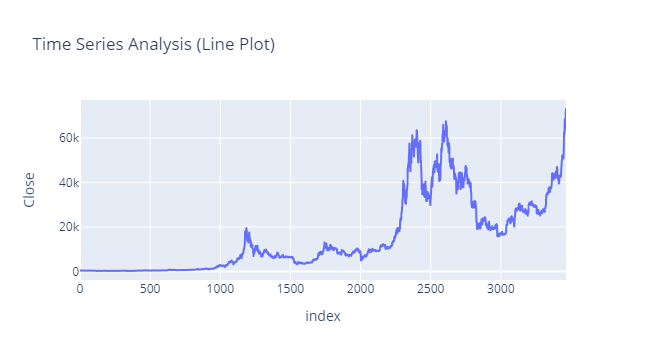

In [35]:
import plotly.express as px
figure = px.line(df1, x = df1.index, 
                 y = "Close", 
                 title = "Time Series Analysis (Line Plot)")
figure.show()

# Draw boxplots to visualize outliers

Text(0, 0.5, 'Volume')

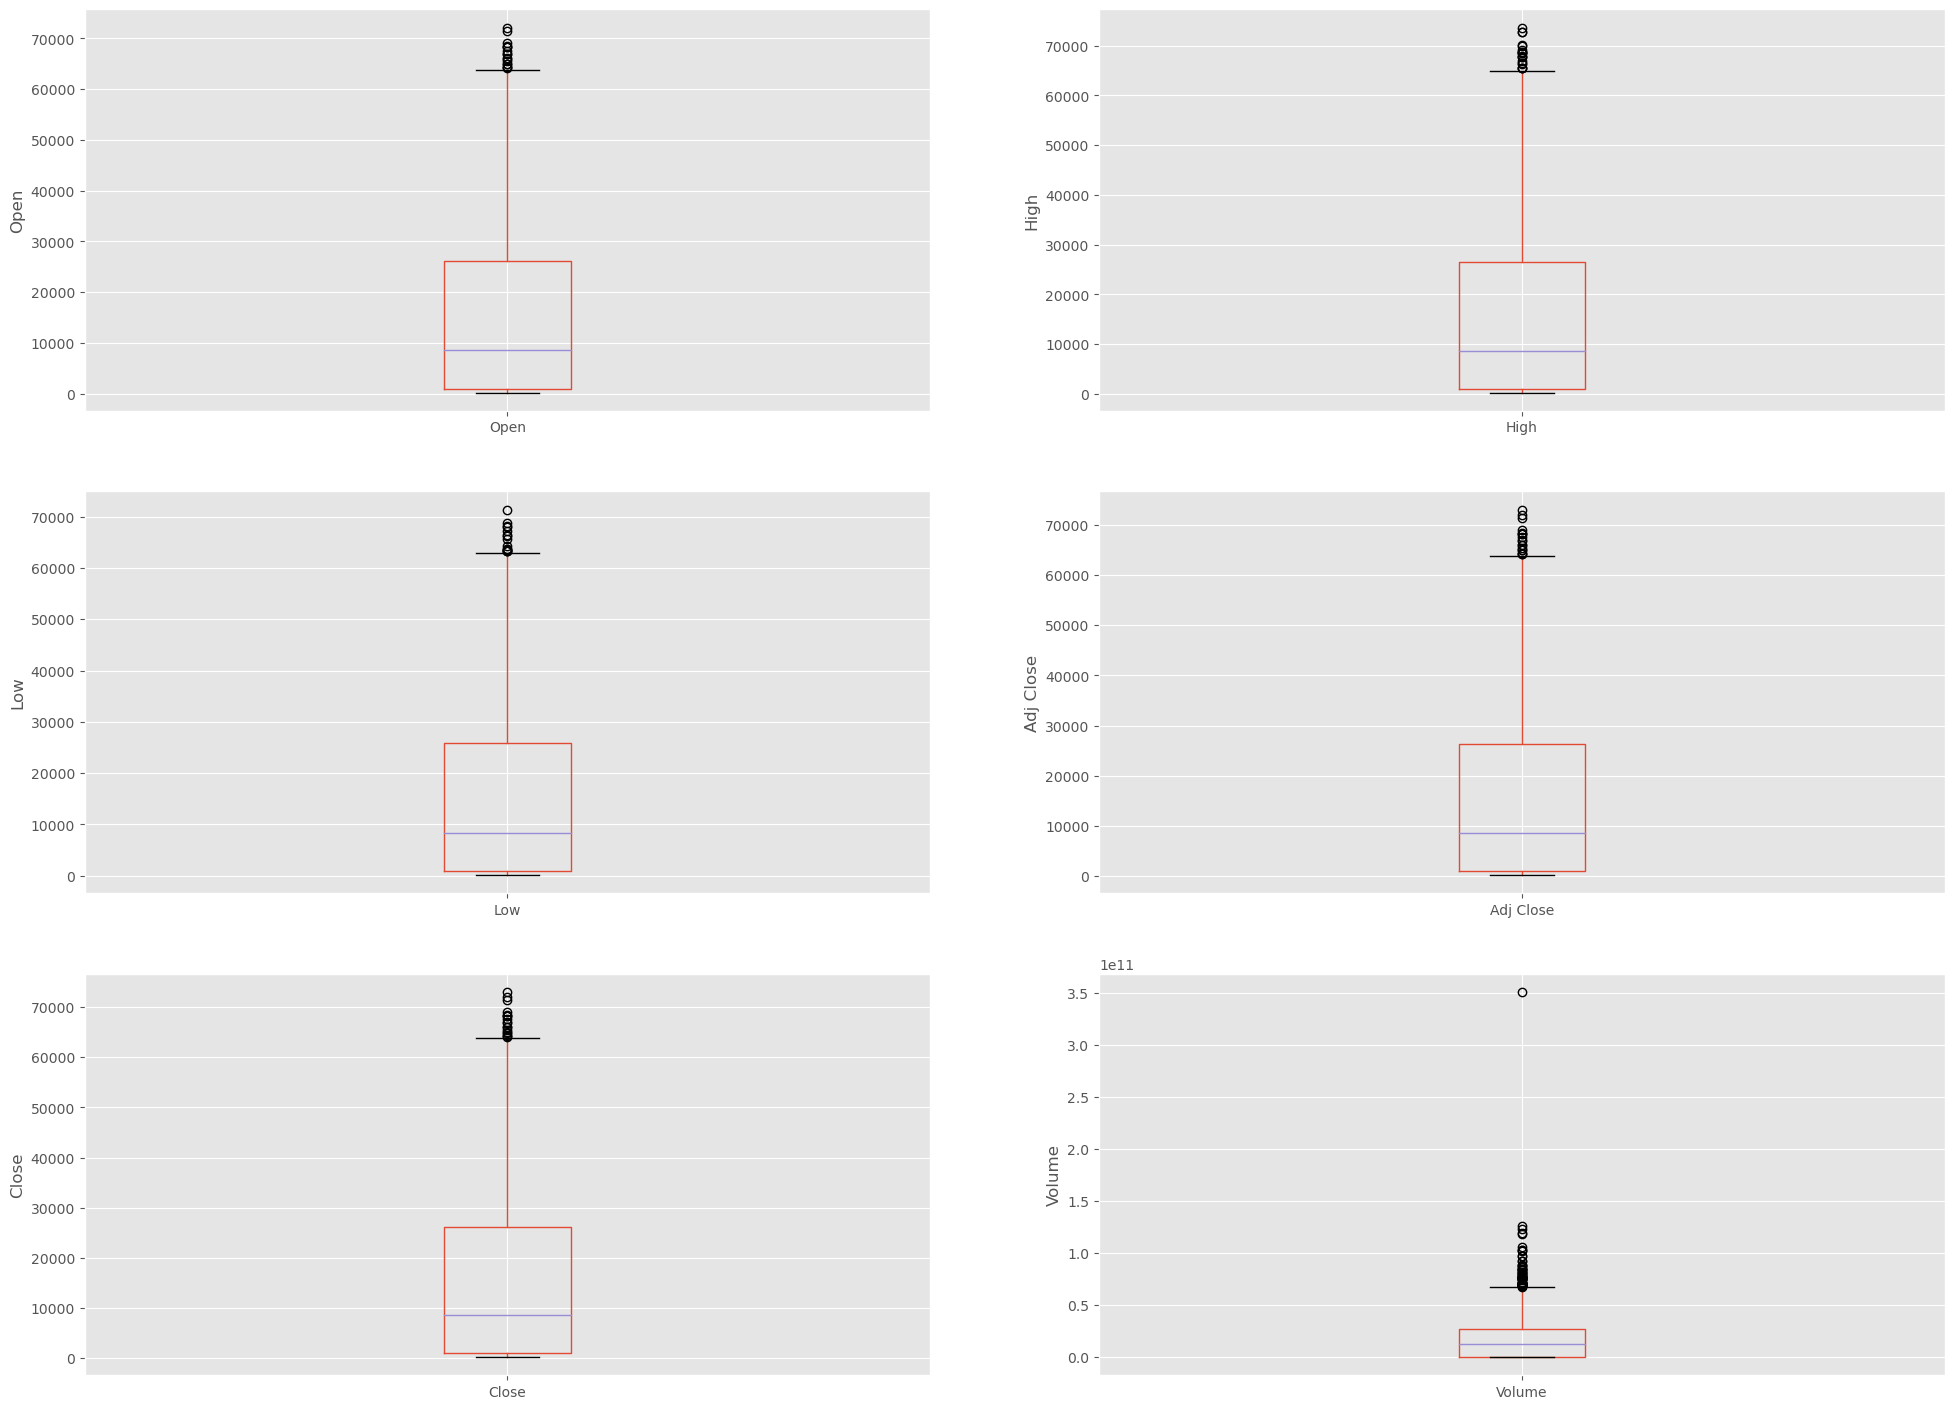

In [36]:


plt.figure(figsize=(24,24))


plt.subplot(4, 2, 1)
fig = df1.boxplot(column='Open')
fig.set_title('')
fig.set_ylabel('Open')


plt.subplot(4, 2, 2)
fig = df1.boxplot(column='High')
fig.set_title('')
fig.set_ylabel('High')

plt.subplot(4, 2, 3)
fig = df1.boxplot(column='Low')
fig.set_title('')
fig.set_ylabel('Low')


plt.subplot(4, 2, 4)
fig = df1.boxplot(column='Adj Close')
fig.set_title('')
fig.set_ylabel('Adj Close')

plt.subplot(4, 2, 5)
fig = df1.boxplot(column='Close')
fig.set_title('')
fig.set_ylabel('Close')


plt.subplot(4, 2, 6)
fig = df1.boxplot(column='Volume')
fig.set_title('')
fig.set_ylabel('Volume')

# Plot histogram to check distribution

Text(0, 0.5, 'Volume Value')

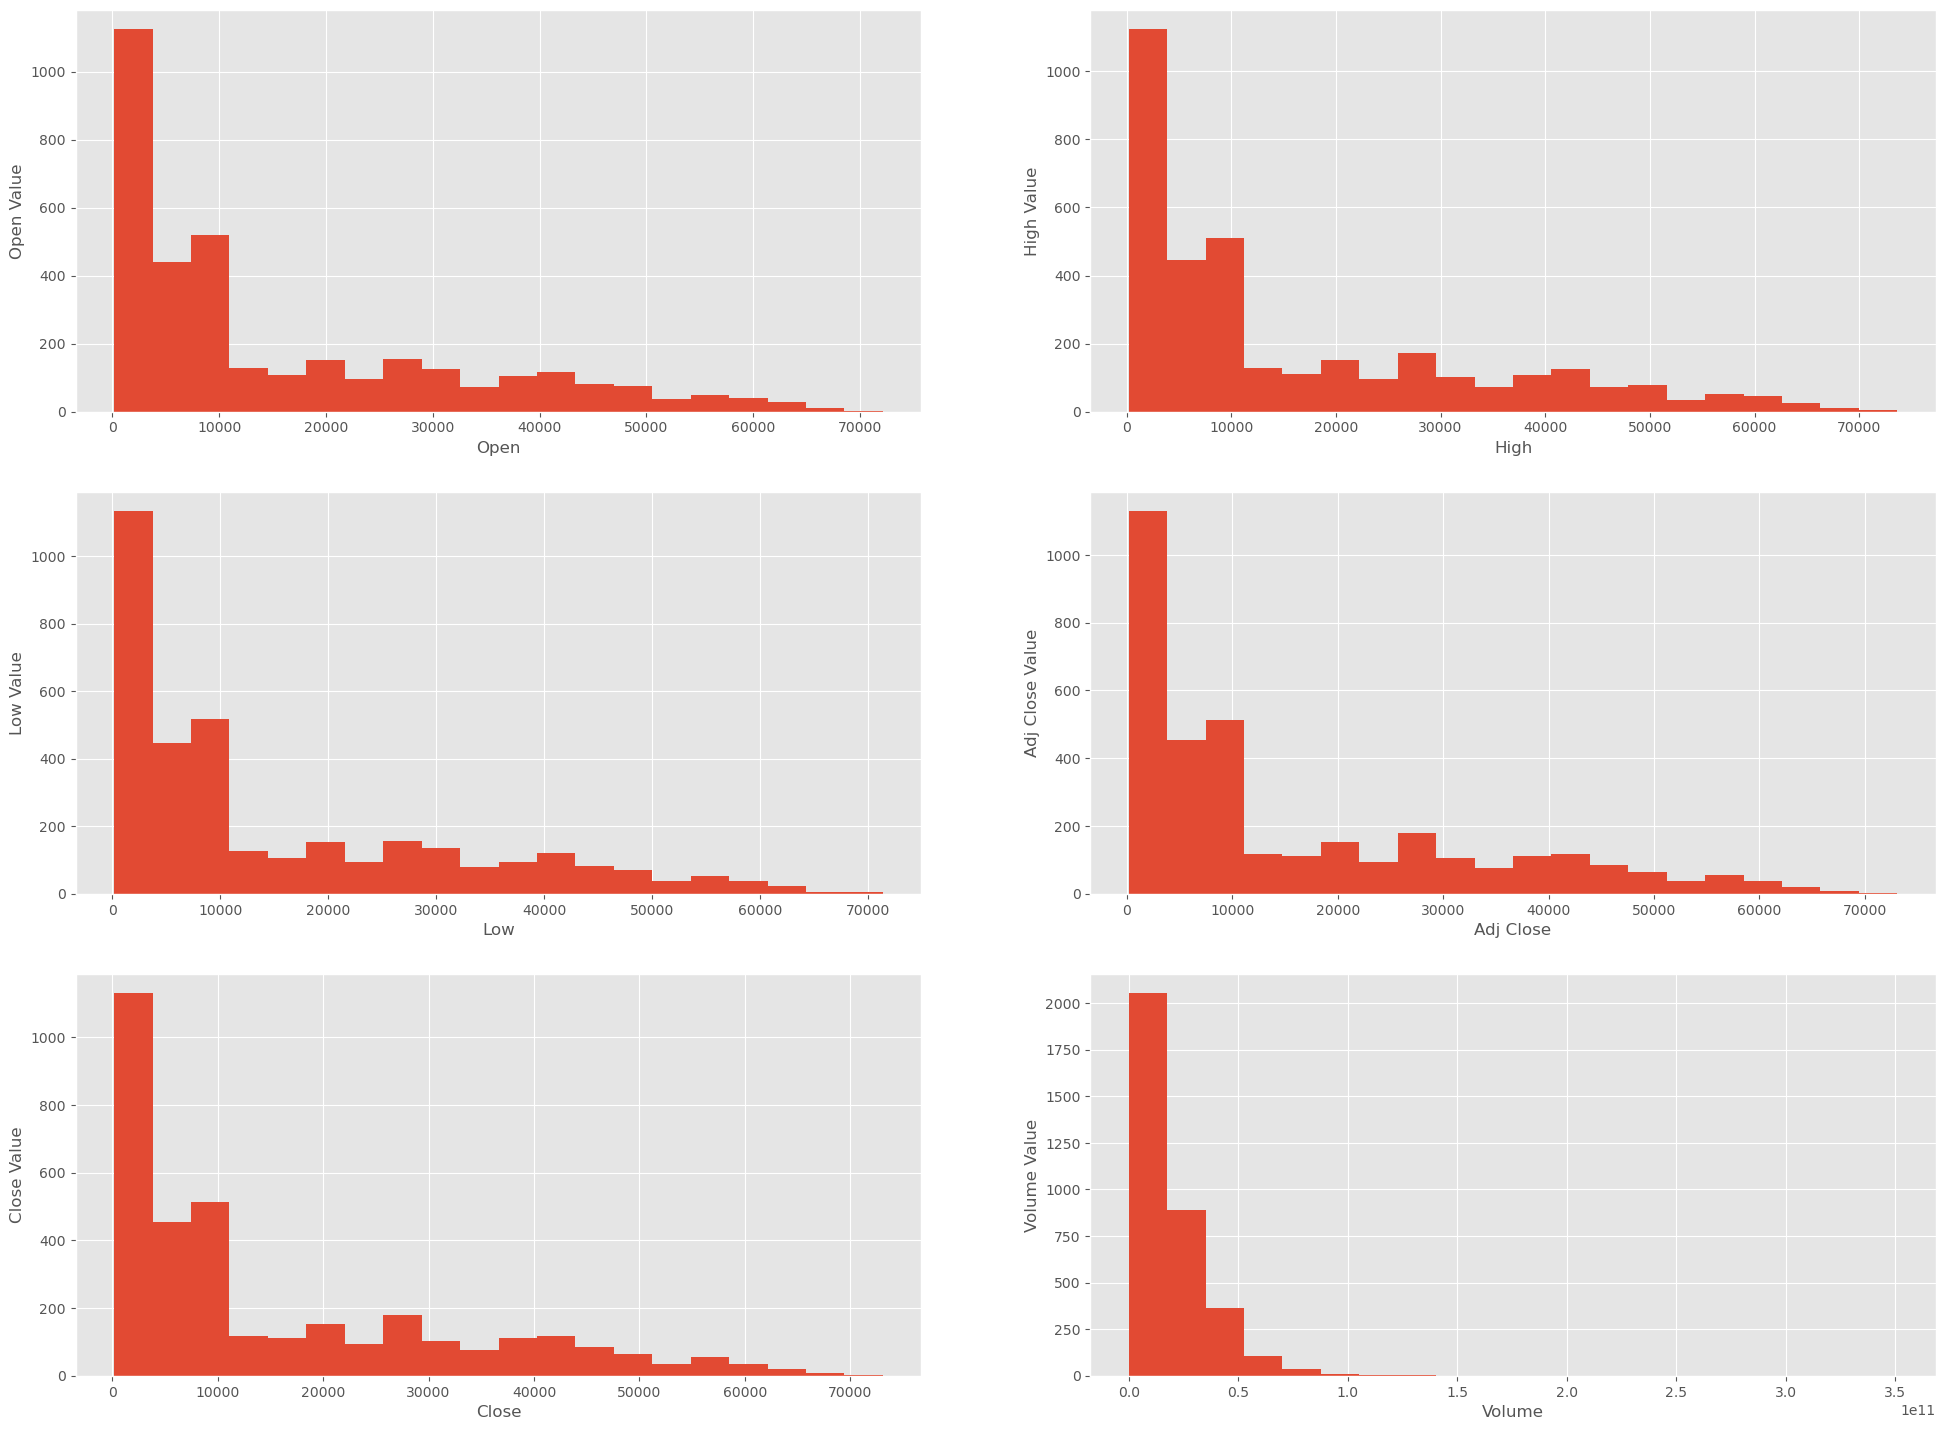

In [37]:



plt.figure(figsize=(24,24))


plt.subplot(4, 2, 1)
fig = df1['Open'].hist(bins=20)
fig.set_xlabel('Open')
fig.set_ylabel('Open Value')


plt.subplot(4, 2, 2)
fig = df1['High'].hist(bins=20)
fig.set_xlabel('High')
fig.set_ylabel('High Value')

plt.subplot(4, 2, 3)
fig = df1['Low'].hist(bins=20)
fig.set_xlabel('Low')
fig.set_ylabel('Low Value')



plt.subplot(4, 2, 4)
fig = df1['Adj Close'].hist(bins=20)
fig.set_xlabel('Adj Close')
fig.set_ylabel('Adj Close Value')



plt.subplot(4, 2, 5)
fig = df1['Close'].hist(bins=20)
fig.set_xlabel('Close')
fig.set_ylabel('Close Value')

plt.subplot(4, 2, 6)
fig = df1['Volume'].hist(bins=20)
fig.set_xlabel('Volume')
fig.set_ylabel('Volume Value')

# Further Visual Analysis

In [38]:
# Creating colour palette
palette_asset = {'orange': '#f7931a',
               'white' : '#ffffff',
               'gray'  : '#4d4d4d',
               'blue'  : '#0d579b',
               'green' : '#329239'
              }

# FOrmatting Data for plots

In [39]:
dfg['date'] = pd.to_datetime(dfg['Date'], format='%Y-%m-%d %H:%M:%S')
dfg = dfg.loc[:, ['date', 'Open', 'Close', 'High', 'Low']]
dfg = dfg.rename({'Open': 'open', 'Close': 'close', 'High': 'high', 'Low': 'low'}, 
                    axis=1)
dfg = dfg.set_index('date')
dfg = dfg.asfreq('D')
dfg = dfg.sort_index()

# Check Null Values

In [40]:
print(f'Number of rows with missing values: {dfg.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


# Drop Null Values

In [41]:
dfg = dfg.dropna()

# Locate corresponding data for each year`

In [42]:

years = list(dfg.index.year.unique())
df_plot = pd.DataFrame()

for year in years:
    
    year_open  = dfg.loc[dfg.index.year == year, 'open'][0]
    year_close = dfg.loc[dfg.index.year == year, 'close'][-1]
    year_low   = dfg.loc[dfg.index.year == year, 'low'].min()
    year_high  = dfg.loc[dfg.index.year == year, 'high'].max()
    
    df_plot[year] = pd.Series([year_open, year_close, year_low, year_high]) 
    
df_plot = df_plot.T
df_plot = df_plot.set_axis(['open', 'close', 'low', 'high'], axis=1)



# Calculate % change between the open and close price of the year

In [43]:

df_plot['year_change'] = 100*(df_plot['close'] - df_plot['open']) / df_plot['open']
df_plot.head(3)

,open,close,low,high,year_change
2014,465.864014,320.192993,289.295990,468.174011,-31.269000
2015,320.434998,430.566986,171.509995,495.562012,34.369526
2016,430.721008,963.742981,354.914001,979.396973,123.751097


# Create a list of dicts with the % change annotations for the plot

In [44]:

annotations_list = []
max_high = df_plot['high'].max()

for year in years:
    
    df_aux = df_plot.loc[df_plot.index == year,]
    loc_x = pd.to_datetime(df_aux.index[0], format='%Y')
    loc_y = df_aux['high'].values[0]/max_high + 0.05
    text = '{:.1f}%'.format(df_aux['year_change'].values[0])
    
    annotation = dict(x=loc_x, y=loc_y, 
                      xref='x', yref='paper',
                      showarrow=False, xanchor='center', 
                      text=text)

    annotations_list.append(annotation)

# Interactive candlestick chart with Plotly

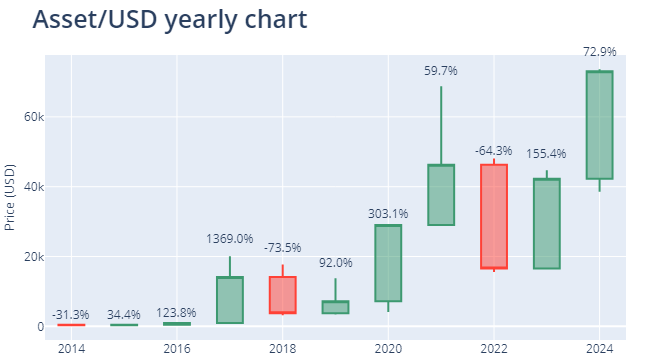

In [45]:

candlestick = go.Candlestick(
                    x     = pd.to_datetime(df_plot.index, format='%Y'),
                    open  = df_plot.open,
                    close = df_plot.close,
                    low   = df_plot.low,
                    high  = df_plot.high
                    )

fig = go.Figure(data=[candlestick])

fig.update_layout(
    width       = 800,
    height      = 350,
    title       = dict(text='<b>Asset/USD yearly chart</b>', font=dict(size=25)),
    yaxis_title = dict(text='Price (USD)', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20),
    xaxis_rangeslider_visible = False,
    annotations = annotations_list
    )

# Locate corresponding data for each month

In [46]:

years = list(dfg.index.year.unique())
df_plot = pd.DataFrame()

for year in years:
    for month in range(12):
        
        start_date = pd.to_datetime(f'{year}-{month+1}-01', format='%Y-%m-%d')
        end_date = (start_date + pd.offsets.MonthBegin())
        mask = (dfg.index >= start_date) & (dfg.index < end_date)
        
        if not dfg.loc[mask, :].empty:
                        
            month_open  = dfg.loc[mask, 'open'][0]
            month_close = dfg.loc[mask, 'close'][-1]
            month_low   = dfg.loc[mask, 'low'].min()
            month_high  = dfg.loc[mask, 'high'].max()
            
            serie  = pd.Series([month_open, month_close, month_low, month_high])
            df_aux = pd.DataFrame(serie, columns=[f'{str(month+1).zfill(2)}-{year}'])
            
            if df_plot.empty:
                df_plot = df_aux.copy()
            else:
                df_plot = pd.concat([df_plot, df_aux], axis=1)

df_plot = df_plot.T
df_plot = df_plot.set_axis(['open', 'close', 'low', 'high'], axis=1)

# Boxplot chart for annual seasonality

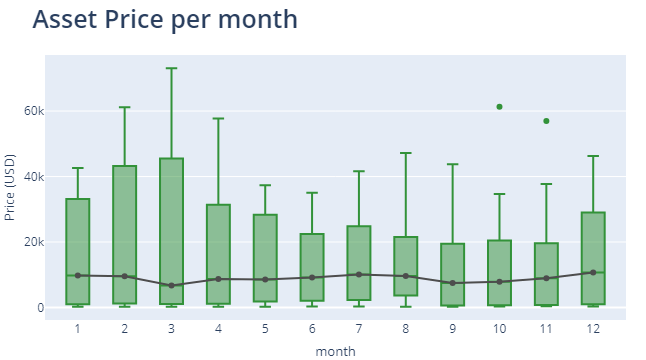

In [47]:
df_plot['month'] = pd.to_datetime(df_plot.index, format='%m-%Y').month

# fig 1 monthly boxplot
fig1 = px.box(df_plot.sort_values('month'), x='month', y='close',
              color_discrete_sequence=[palette_asset['green']])

# fig 2 line with median data for each month
df_median = pd.DataFrame(df_plot.groupby('month')['close'].median()).reset_index()
fig2 = px.line(df_median, x='month', y='close', markers=True,
               color_discrete_sequence=[palette_asset['gray']])

fig = go.Figure(data=fig1.data + fig2.data)

fig.update_layout(
    width       = 650,
    height      = 350,
    title       = dict(text='<b>Asset Price per month</b>', font=dict(size=25)),
    yaxis_title = dict(text='Price (USD)', font=dict(size=13)),
    xaxis       = dict(tickmode='linear'),
    xaxis_title = dict(text='month', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20)
    )

fig.show()

# Boxplot chart for monthly seasonality

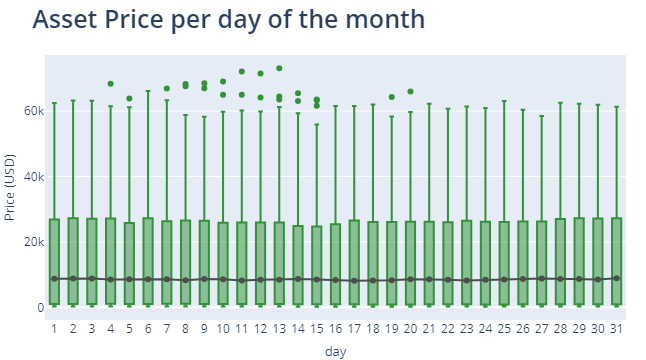

In [48]:
dfg['day'] = pd.Series(dfg.index).dt.day.values

# fig 1 dayly boxplot
fig1 = px.box(dfg.sort_values('day'), x='day', y='close',
              color_discrete_sequence=[palette_asset['green']])

# fig 2 line with median data for each day
df_median = pd.DataFrame(dfg.groupby('day')['close'].median()).reset_index()
fig2 = px.line(df_median, x='day', y='close', markers=True,
               color_discrete_sequence=[palette_asset['gray']])

fig = go.Figure(data=fig1.data + fig2.data)

fig.update_layout(
    width       = 750,
    height      = 350,
    title       = dict(text='<b>Asset Price per day of the month</b>', font=dict(size=25)),
    yaxis_title = dict(text='Price (USD)', font=dict(size=13)),
    xaxis       = dict(tickmode='linear', tickangle=0, range=[0.5, 31.5]),
    xaxis_title = dict(text='day', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20)
    )

fig.show()

# Boxplot chart for weekly seasonality

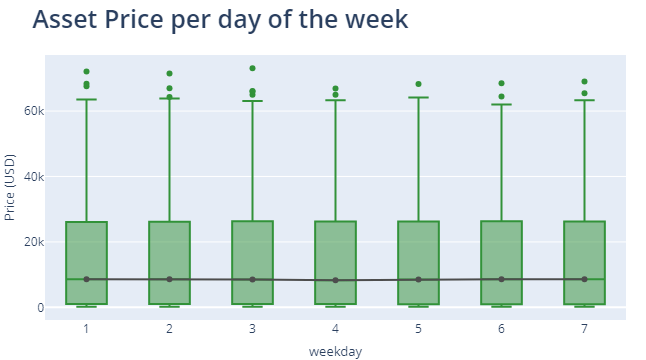

In [49]:
dfg['weekday'] = dfg.index.day_of_week + 1

# fig 1 weekly boxplot
fig1 = px.box(dfg.sort_values('weekday'), x='weekday', y='close',
              color_discrete_sequence=[palette_asset['green']])

# fig 2 line with median data for each weekday
df_median = pd.DataFrame(dfg.groupby('weekday')['close'].median()).reset_index()
fig2 = px.line(df_median, x='weekday', y='close', markers=True,
               color_discrete_sequence=[palette_asset['gray']])

fig = go.Figure(data=fig1.data + fig2.data)

fig.update_layout(
    width       = 650,
    height      = 350,
    title       = dict(text='<b>Asset Price per day of the week</b>', font=dict(size=25)),
    yaxis_title = dict(text='Price (USD)', font=dict(size=13)),
    xaxis       = dict(tickmode='linear'),
    xaxis_title = dict(text='weekday', font=dict(size=13)),
    margin      = dict(l=0, r=20, t=55, b=20)
    )

fig.show()

# Forecasting

# Create extra column ->  "Prediction" which will enable prediction on x -day(s):

In [50]:
#Create one more column Prediction shifted 15 days up. 
df['Prediction'] = df[['Adj Close']].shift(-15)
#print data set
print(df)

         Adj Close  Prediction
0       457.334015  375.071991
1       424.440002  359.511993
2       394.795990  328.865997
3       408.903992  320.510010
4       398.821014  330.079010
...            ...         ...
3461  68498.882812         NaN
3462  69019.789062         NaN
3463  72123.906250         NaN
3464  71481.289062         NaN
3465  73083.500000         NaN

[3466 rows x 2 columns]


# Create Dataset 'X' which contains actual values:

In [51]:
#Create a data set X and convert it into numpy array , which will be having actual values
#X=np.array(df.drop(['Prediction'],.drop('saliency', axis=1)
X = np.array(df.drop(['Prediction'],axis=1))
#Remove the last 15 rows
X = X[:-15]
print(X)

[[  457.33401489]
 [  424.44000244]
 [  394.79598999]
 ...
 [51733.23828125]
 [54522.40234375]
 [57085.37109375]]


# Create Dataset 'y' which contains predicted values:

In [52]:
# Create a dataset y which will be having Predicted values and convert into numpy array
y = np.array(df['Prediction'])
# Remove Last 15 rows
y = y[:-15]
print(y)

[  375.07199097   359.51199341   328.86599731 ... 72123.90625
 71481.2890625  73083.5       ]


# Split the data into train and test with 90 & 10 % respectively

In [53]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# SVM Model

In [54]:
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
# Train the model 
svr.fit(x_train, y_train)

SVR(C=1000.0, gamma=0.1)

# Fitting values to be forecasted. '[-1:] contains the number of days' forecasts:

In [55]:
forecast = np.array(df.drop(['Prediction'],axis=1))[-1:]
print(forecast)

[[73083.5]]


# Actual Forecast(s)

In [56]:
# support vector model predictions for the next ‘x’ days
svm_prediction = svr.predict(forecast)
print(svm_prediction)

[9527.36791816]


# Model Evaluation (SVM Confidence):

In [27]:
# The best possible score is 1.0
svm_confidence = svr.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  -0.03382675604643137
